In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cupy as cp
from keras.models import load_model
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [9]:
# set GPU memory
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [10]:
model = load_model('./classification_30ball_20200505_256to8')

In [17]:
top5_test = pd.read_csv('./datasets/30balls/top5_test.csv', header=None)
top5_test = np.array(top5_test)
top5_test.shape

(250, 90)

In [18]:
row = 30
col = 3

In [19]:
np.set_printoptions(suppress=True)

1/1 [==============================] - 0s 2ms/step


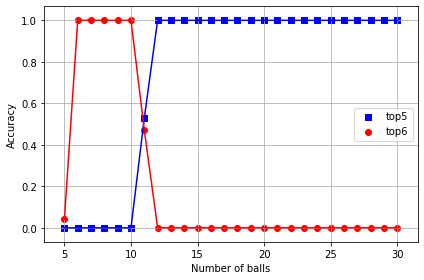

In [98]:
prob = np.zeros((1,8))
for i in range(14,90,3):
    tmp = top5_test[1,:i]
    tmp = tmp.reshape(1, tmp.shape[0])
    tmp = sequence.pad_sequences(tmp, maxlen=(row*col), padding='post', dtype='float32')
    tmp = tmp.reshape(1, 30, 3)
    #print((i+1)/3)
    preddd = model.predict(tmp, verbose=1)
    #print(preddd)
    prob = np.vstack((prob, preddd))
    
prob = prob[1:,:]
plt.plot(np.arange(0+5,prob.shape[0]+5,1), prob[:,0], color='b')
plt.scatter(np.arange(0+5,prob.shape[0]+5,1), prob[:,0], color='b', marker='s', label='top5')

plt.plot(np.arange(0+5,prob.shape[0]+5,1), prob[:,1], color='r')
plt.scatter(np.arange(0+5,prob.shape[0]+5,1), prob[:,1], color='r', marker='o', label='top6')

plt.grid(True)
plt.xlabel('Number of balls')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('/home/lab606a/Pictures/increasing2.png')

In [101]:
ax = plt.figure()
ax.plot(np.array([1,2,3]),np.array([1,2,3]))

AttributeError: 'Figure' object has no attribute 'plot'

<Figure size 432x288 with 0 Axes>

In [27]:
prob = prob[1:,:]
prob.shape

(26, 8)

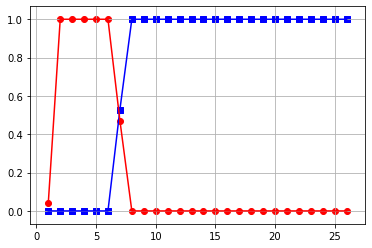

In [36]:
plt.plot(np.arange(1,prob.shape[0]+1,1), prob[:,0], color='b')
plt.scatter(np.arange(1,prob.shape[0]+1,1), prob[:,0], color='b', marker='s')

plt.plot(np.arange(1,prob.shape[0]+1,1), prob[:,1], color='r')
plt.scatter(np.arange(1,prob.shape[0]+1,1), prob[:,1], color='r', marker='o')

plt.grid(True)

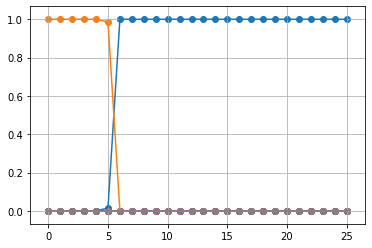

In [88]:
#plt.plot(np.arange(0,prob.shape[0],1), prob)
#plt.scatter(np.arange(0,prob.shape[0],1), prob, marker='o')

for i in range(prob.shape[1]):
    #print(i)
    plt.scatter(np.arange(0,prob.shape[0],1), prob[:,i], marker='o')
    plt.plot(np.arange(0,prob.shape[0],1), prob[:,i])
#plt.show()
#plt.scatter(np.arange(0,prob.shape[0],1), prob[:,:], marker='o')
plt.grid(True)

In [15]:
'''
for i in range(14,90,3):
    tmp = top5_test[0,:i]
    tmp = tmp.reshape(1, tmp.shape[0])
    tmp = sequence.pad_sequences(cp.asnumpy(tmp), maxlen=(row*col), padding='post', dtype='float32')
    tmp = tmp.reshape(1, 30, 3)
    #print((i+1)/3)
    #print(type(tmp))
    now = rospy.get_time()
    preddd = model.predict(tmp, batch_size=None, verbose=1)
    now2 = rospy.get_time()
    print("taken time =",now2-now)
    #print(preddd)
'''

'\nfor i in range(14,90,3):\n    tmp = top5_test[0,:i]\n    tmp = tmp.reshape(1, tmp.shape[0])\n    tmp = sequence.pad_sequences(cp.asnumpy(tmp), maxlen=(row*col), padding=\'post\', dtype=\'float32\')\n    tmp = tmp.reshape(1, 30, 3)\n    #print((i+1)/3)\n    #print(type(tmp))\n    now = rospy.get_time()\n    preddd = model.predict(tmp, batch_size=None, verbose=1)\n    now2 = rospy.get_time()\n    print("taken time =",now2-now)\n    #print(preddd)\n'